깃허브 파일에서 바로 이 [링크](https://colab.research.google.com/github/kaicd/ai_drug_development_2020/blob/master/beginner/day1/colab사용법_및_데이터로드_시각화.ipynb)를 클릭하시면 코랩에서 바로 열 수 있습니다.

# 환경 살펴보기

In [ ]:
# OS
!cat /etc/issue.net

Ubuntu 18.04.5 LTS


In [ ]:
# CPU 사양
!head /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.148
cache size	: 39424 KB
physical id	: 0


In [ ]:
# 메모리 사양
!head -n 3 /proc/meminfo

MemTotal:       13333536 kB
MemFree:        10695720 kB
MemAvailable:   12506348 kB


In [ ]:
# 디스크 사양
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         226G   30G  186G  14% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       233G   32G  201G  14% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


# GPU 사용하기
* Colab에서 GPU를 사용하기 위해서는 런타임 유형을 변경해야 한다. 
* Colab 화면 상단바에서 "런타임" > "런타임 유형 변경" > "하드웨어 가속기" 설정을 None 에서 GPU로 변경한다. (TPU로도 변경이 가능하다.)

런타임 유형을 GPU로 변경한 이후에는 !nvidia-smi 명령어로 GPU 사양을 확인 할 수 있다.

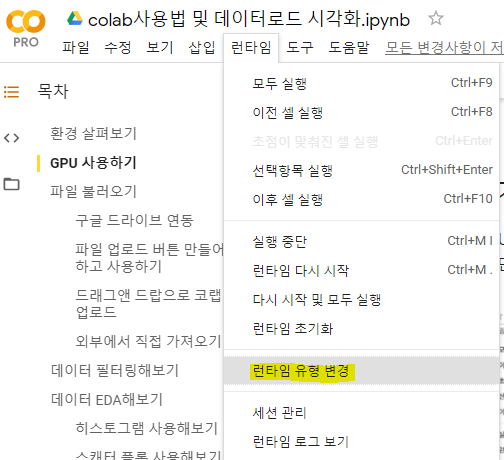

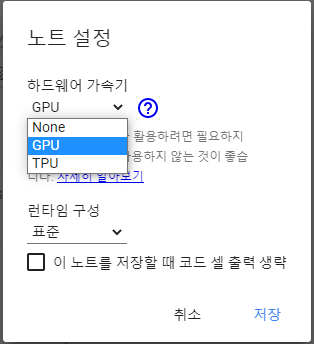

In [ ]:
!nvidia-smi

Sun Sep 27 03:21:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    24W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 파일 불러오기
*  코랩에서는 외부 파일을 여러 방식으로 불러올 수 있다.
1. 구글 드라이브 연동
2. 파일 업로드 버튼 만들어서 파일시스템에 업로드 
3. 드래그앤 드랍으로 코랩 파일시스템에 업로드
4. 외부에서 직접 가져오기


## 구글 드라이브 연동

Colab에 구글드라이브를 연결하면 구글 드라이브에서 데이터 파일을 열거나 저장할 수도 있다.

알려주는 URL 링크를 클릭하여 구글에 로그인하면 비밀키 문자열을 알려준다.

이 비밀키 문자열을 복사하여 Colab에 붙여넣기(ctrl+v)를하면 구글 드라이브와 연결된다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


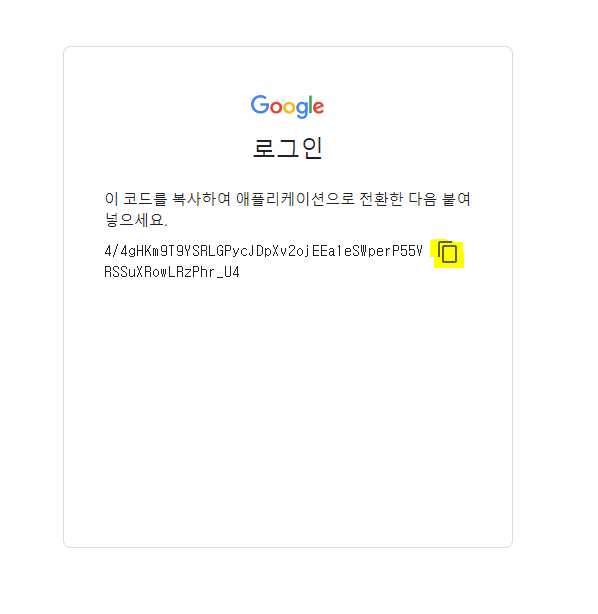

아래의 코드처럼 리눅스 명령어를 사용하여 파일 시스템의 하위구조를 찾아서 내 데이터의 보관 위치를 알아내어 데이터를 가져올 수도 있다.

In [ ]:
!ls '/content/drive/'

'My Drive'


이 폴더 아래에 Dataset이라는 폴더를 만들어봅시다.

In [ ]:
!mkdir -p '/content/drive/My Drive/Dataset'
!ls -Fcal '/content/drive/My Drive/Dataset'

total 0


폴더가 만들어졌으면 다음 코드로 Dataset 폴더 안에 df.csv 라는 이름의 데이터 파일(.csv확장자)을 만들 수 있다.
아래의 코드에서는 csv데이터를 불러오는데 일반적으로 사용되는 pandas를 사용한다.

온전히 통계 분석을 위해 고안된 R 과는 다르게 python은 일반적인 프로그래밍 언어(general purpose programming language) 이며, 데이터 분석을 하기 위해서는 여러가지 라이브러리를 사용할 수 밖에 없다. 

이 패키지들 중 R의 dataframe 데이터 타입을 참고하여 만든 것이 바로 pandas dataframe이다. pandas는 dataframe을 주로 다루기 위한 라이브러리이며, dataframe을 자유롭게 가공하여 원하는 모양으로 데이터를 가공하거나, 원하는 형태로 타입을 변환하는 등의 작업들을 수행할 수 있다.

In [ ]:
import pandas as pd

df = pd.DataFrame(np.random.rand(10, 5))
df.to_csv("/content/drive/My Drive/Dataset/df.csv")

In [ ]:
pd.read_csv("/content/drive/My Drive/Dataset/df.csv")

,Unnamed: 0,0,1,2,3,4
0,0,0.542079,0.383529,0.685809,0.531241,0.536150
1,1,0.559236,0.693924,0.596102,0.285596,0.578736
2,2,0.358667,0.300352,0.394516,0.239773,0.873270
3,3,0.773911,0.329857,0.209660,0.216559,0.746622
4,4,0.241425,0.214230,0.286227,0.858154,0.582816
5,5,0.267127,0.621322,0.961884,0.030270,0.339898
6,6,0.969042,0.197586,0.753579,0.554129,0.222911
7,7,0.613811,0.398839,0.409887,0.065727,0.846558
8,8,0.862340,0.722880,0.589696,0.980219,0.600442
9,9,0.877692,0.472786,0.810297,0.744588,0.927456


Colab에서 파일 시스템의 구조를 살펴보는데에는 화면 왼쪽의 폴더 모양을 누르면 된다.
또한  drive를 클릭하면 하위 구조가 나타나고 drive >My Drive에 구글 드라이브에 올려진 파일들이 나타난다.

sample_data는 colab 실행 시 자동으로 생성된 데이터셋 폴더로 여기에 파일을 업로드하여 사용할 수 있다.

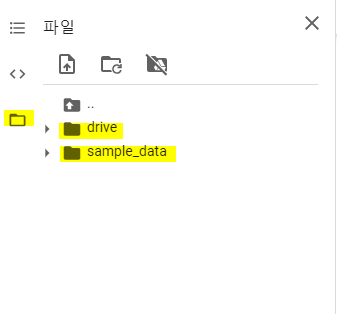

드라이브 연동 이후 Dataset에 어떤식으로든 사용할 데이터 파일을 옮겨두면 위처럼 읽어들일 수 있다.

데이터를 가져오는 방법과 간단하게 데이터를 불러온 후 시각화하는 부분을 수행할때 2일차에 사용할 데이터인 ESOL을 불러오겠다.

아래의 링크에 접속하여 ESOL 링크를 클릭하면 데이터가 압축파일로 다운로드되니 압축을 풀어서 여러가지 업로드 방법을 진행해 볼 수 있다.

http://moleculenet.ai/datasets-1

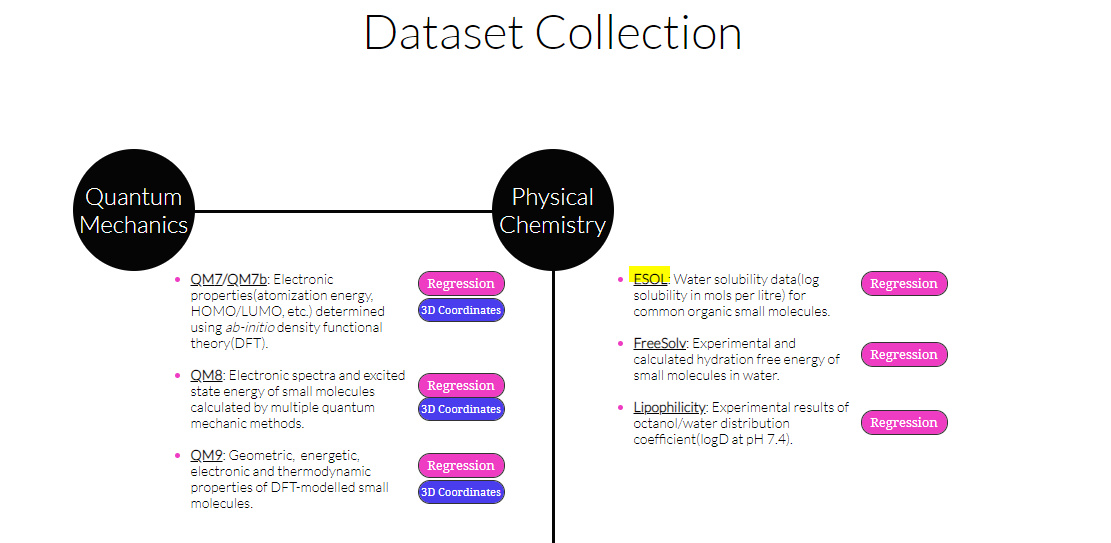

드라이브의  Dataset폴더에 바로 업로드하는 방법은 아래의 그림과 같이 드라이브에서 내가 사용할 데이터 폴더인 Dataset에 파일을 직접 업로드하는 방식이다.

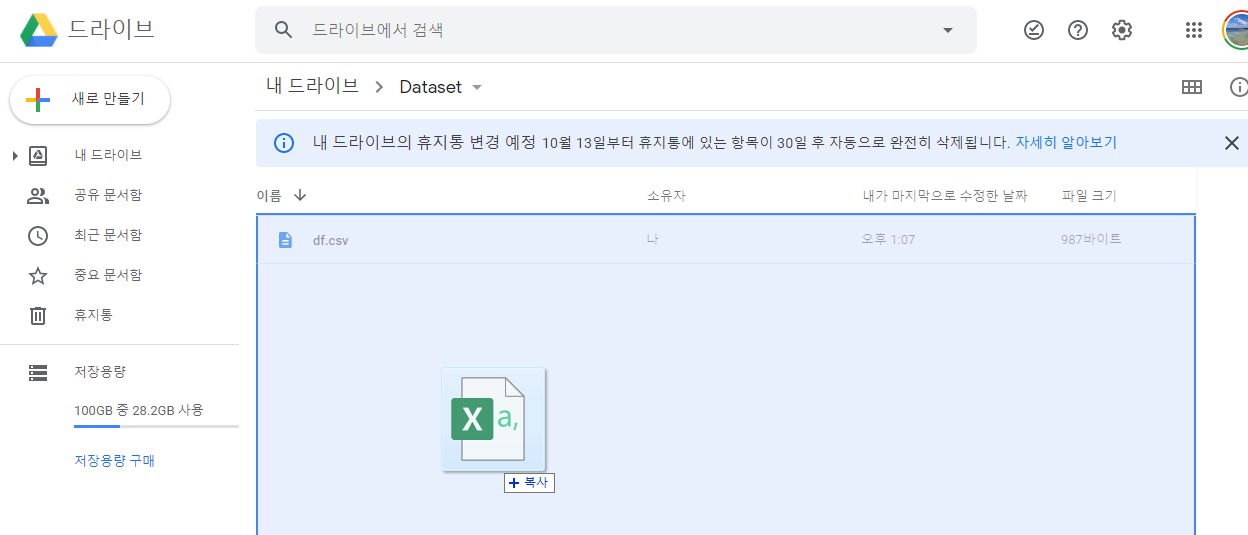

## 2. 파일 업로드 버튼 만들어서 파일 업로드하고 사용하기
* 아래와 같은 코드를 추가하여 실행하면 파일 업로드 버튼이 생기고 파일을 colab 파일 시스템에 업로드 가능하다. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving delaney-processed.csv to delaney-processed.csv


다운로드 받은 파일이 저장되는 기본위치인 다운로드에서 ESOL.zip의 압축을 해제한 폴더 ESOL 폴더의 delaney-processed.csv를 선택하여 업로드할 수 있다.

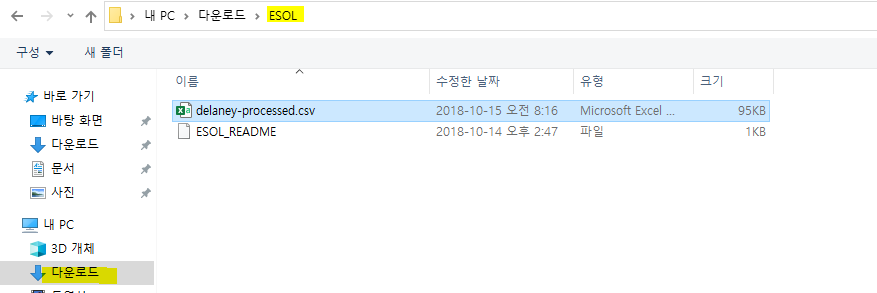

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("delaney-processed.csv")
data

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


## 3. 드래그앤 드랍으로 코랩 파일시스템에 업로드

아래의 그림과 같이 파일 시스템의 구조를 보는 화면에 드래그앤드랍으로 파일을 업로드 할 수 있다. 

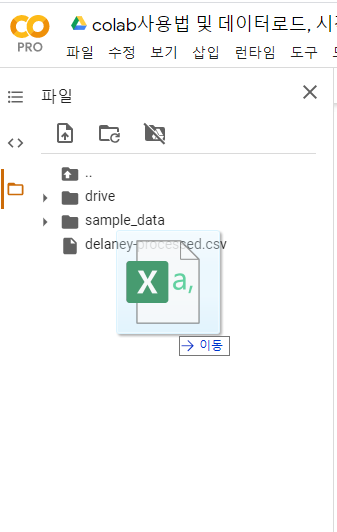

어느 폴더or 디렉토리 하위 구조에 속하도록 만들지 않으면, 파일명.확장자로 바로 데이터를 불러올 수 있다.

In [ ]:
import pandas as pd

data = pd.read_csv("delaney-processed.csv")
data

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


data에.head()를 사용하면 5개 행의 데이터만을 볼 수 있다.

In [ ]:
data.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


데이터의 열이 많이 한번에 보기 힘든 경우에는 마지막에.T를 붙여주면 보기가 좋다.

In [ ]:
data.head().T

,0,1,2,3,4
Compound ID,Amigdalin,Fenfuram,citral,Picene,Thiophene
ESOL predicted log solubility in mols per litre,-0.974,-2.885,-2.579,-6.618,-2.232
Minimum Degree,1,1,1,2,2
Molecular Weight,457.432,201.225,152.237,278.354,84.143
Number of H-Bond Donors,7,1,0,0,0
Number of Rings,3,2,0,5,1
Number of Rotatable Bonds,7,2,4,0,0
Polar Surface Area,202.32,42.24,17.07,0,0
measured log solubility in mols per litre,-0.77,-3.3,-2.06,-7.87,-1.33
smiles,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,Cc1occc1C(=O)Nc2ccccc2,CC(C)=CCCC(C)=CC(=O),c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,c1ccsc1


## 4. 외부에서 직접 가져오기

!wget 명령어를 사용하면 파일을 내 로컬 PC로 외부 데이터를 다운받고 다시 colab 파일 시스템으로 옮기는 1.2.3번과 같은 작업을 수행하지 않아도 colab의 파일시스템에 원하는 파일을 가져올 수 있다.

http://moleculenet.ai/datasets-1
위 주소에 접속하여 우리가 다운받을 때 사용했던 ESOL에 우클릭을하고 링크 주소 복사를 사용하여 링크를 가져와 봅시다.
그리고나서 코드셸을 하나 만들고 !wget 명령어 뒤에 붙여넣기를 해주면 된다.

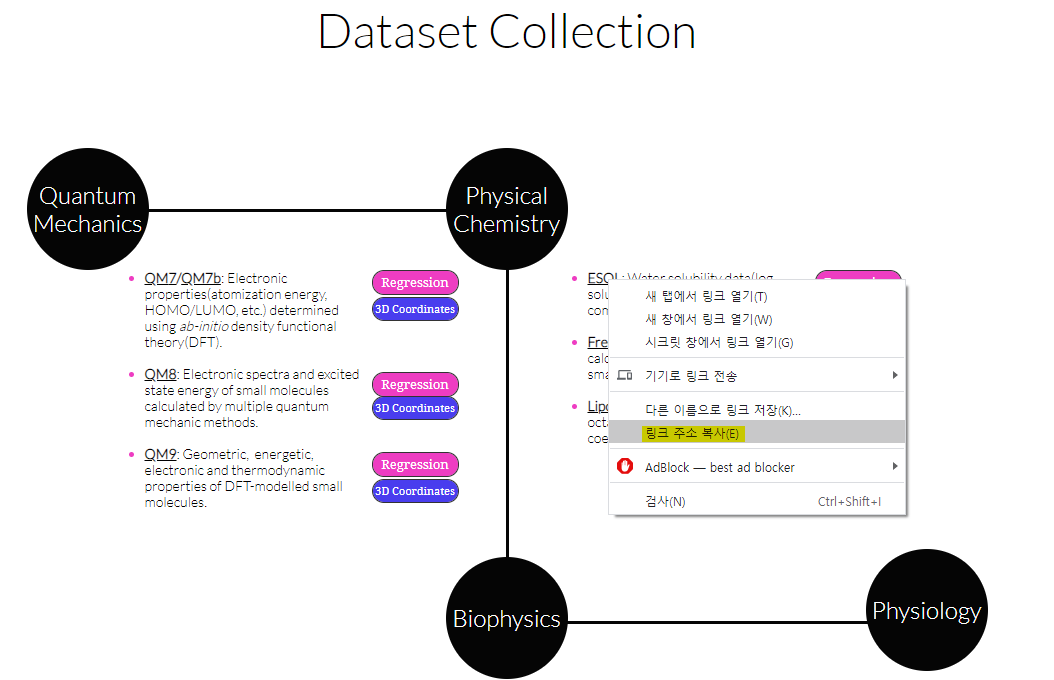

In [ ]:
!wget https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/ESOL.zip

--2020-09-28 00:53:43--  https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/ESOL.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.208
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32317 (32K) [application/zip]
Saving to: ‘ESOL.zip’

ESOL.zip            100%[===================>]  31.56K   204KB/s    in 0.2s    

2020-09-28 00:53:44 (204 KB/s) - ‘ESOL.zip’ saved [32317/32317]



그러면 위처럼 다운로드가 진행되고 !ls로 파일이 다운로드된 곳을 확인할 수 있다.

화면 왼쪽의 폴더모양을 눌러 다운로드가 되었는지 확인할 수 있다.
만약 갱신되지 않는다면 폴더에 새로고침모양이 추가된 버튼을 눌러주면 된다. 

압축되지 않은 파일이면 바로 사용할 수 있으나 현재처럼 압축된 파일은 압축 확장자명에 따라 명령어가 다를 수 있으나 !unzip 파일명을 사용하면 압축을 해제할 수 있다.

이미 같은 이름을 가진 csv파일이 있어 셸 실행화면에서 y를 입력으로주면 정상적으로 압축파일이 해제된다.

In [ ]:
!unzip ESOL.zip

Archive:  ESOL.zip
  inflating: delaney-processed.csv   
  inflating: ESOL_README             


In [ ]:
import pandas as pd

data = pd.read_csv("delaney-processed.csv")
data

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


# 데이터 필터링해보기

원하는 컬럼만을 선택하는 방법으로는 컬럼 명을 []안에 주어 선택한다.

띄어쓰기기 없는 경우 data.하면 뒤에 컬럼명으로 원하는 컬럼을 선택할 수 있다.

In [ ]:
data["Compound ID"]

0            Amigdalin
1             Fenfuram
2               citral
3               Picene
4            Thiophene
             ...      
1123         halothane
1124            Oxamyl
1125         Thiometon
1126    2-Methylbutane
1127          Stirofos
Name: Compound ID, Length: 1128, dtype: object

2개 이상의 열 선택할 경우

In [ ]:
data[["Compound ID","Molecular Weight"]]

,Compound ID,Molecular Weight
0,Amigdalin,457.432
1,Fenfuram,201.225
2,citral,152.237
3,Picene,278.354
4,Thiophene,84.143
...,...,...
1123,halothane,197.381
1124,Oxamyl,219.266
1125,Thiometon,246.359
1126,2-Methylbutane,72.151


원하는 행을 선택하는 방법
인덱스에 해당하는 값으로 접근해야하지만 우리의 데이터에는 인덱스가 없이 만들었기 때문에 기본 인덱스 값으로 주어진 0~1127을 사용하여 행 범위를 선택할 수 있다. 



In [ ]:
data[0:5]

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


중복되지 않는 값만 출력하는 함수 unique

In [ ]:
data["Compound ID"].unique()

array(['Amigdalin', 'Fenfuram', 'citral', ..., 'Thiometon',
       '2-Methylbutane', 'Stirofos'], dtype=object)

조건식으로 원하는 값만 필터링 하기 필터링할 열의 이름에 조건문을 걸어주면 True, False의 불리언 출력을 나타내주게된다.(해당 열에서 조건에 부합하는지 확인)

이를 data[]안에 넣어주게되면 True인 것 조건에 부합하는 행만 출력하게된다. 

In [ ]:
data["measured log solubility in mols per litre"]>=1

0       False
1       False
2       False
3       False
4       False
        ...  
1123    False
1124    False
1125    False
1126    False
1127    False
Name: measured log solubility in mols per litre, Length: 1128, dtype: bool

In [ ]:
data[data["measured log solubility in mols per litre"]>=1]

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
10,2-pyrrolidone,0.243,1,85.106,1,1,0,29.10,1.070,O=C1CCCN1
146,Methanol,0.441,1,32.042,1,0,0,20.23,1.570,CO
186,Pyridazine,-0.619,2,80.090,0,1,0,25.78,1.100,c1ccnnc1
201,Methyl hydrazine,0.543,1,46.073,2,0,0,38.05,1.340,CNN
276,Sorbitol,0.647,1,182.172,6,0,5,121.38,1.090,OCC(O)C(O)C(O)C(O)CO
365,Pyrimidine,-0.884,2,80.090,0,1,0,25.78,1.100,c1cncnc1
599,2-Hydroxypyridine,-1.655,1,95.101,1,1,0,33.12,1.020,Oc1ccccn1
605,Acetamide,0.494,1,59.068,1,0,0,43.09,1.580,CC(=O)N
679,Glycerol,0.688,1,92.094,3,0,2,60.69,1.120,OCC(O)CO
687,"N,N-Dimethylacetamide",0.123,1,87.122,0,0,0,20.31,1.110,CN(C)C(=O)C


원하는 값만 제외하고 필터링하기
* ~을 사용하면 조건의 반대에 해당하는 값만을 필터링 할 수 있다.

In [ ]:
data[~data["Number of H-Bond Donors"].isin(['0','1','2','3'])]

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
62,Triamcinolone,-2.734,1,394.439,4,4,2,115.06,-3.680,CC34CC(O)C1(F)C(CCC2=CC(=O)C=CC12C)C3CC(O)C4(O...
102,L-arabinose,0.601,1,150.130,4,1,0,90.15,0.390,C1OC(O)C(O)C(O)C1O
109,Inosine,-0.834,1,268.229,4,3,2,133.75,-1.230,OCC1OC(C(O)C1O)n2cnc3c(O)ncnc23
150,tubercidin,-0.892,1,266.257,4,3,2,126.65,-1.950,Nc1ncnc2n(ccc12)C3OC(CO)C(O)C3O
233,mannitol,0.647,1,182.172,6,0,5,121.38,0.060,OCC(O)C(O)C(O)C(O)CO
276,Sorbitol,0.647,1,182.172,6,0,5,121.38,1.090,OCC(O)C(O)C(O)C(O)CO
298,Raffinose,0.496,1,504.438,11,3,8,268.68,-0.410,OCC1OC(CO)(OC2OC(COC3OC(CO)C(O)C(O)C3O)C(O)C(O...
341,glucose,0.501,1,180.156,5,1,1,110.38,0.740,OCC1OC(O)C(O)C(O)C1O
428,Morin,-2.731,1,302.238,5,3,1,131.36,-3.083,Oc1ccc(c(O)c1)c3oc2cc(O)cc(O)c2c(=O)c3O


# 데이터 EDA해보기

그림 Resolution을 높이기 위한 옵션

In [ ]:
#아래를 추가하면 맥에서 수행할 때 그림 resolution이 높아진다.
%config InlineBackend.figure_format = 'retina'
#아래를 추가하면 윈도우나 맥에서 모두 사용 가능, 시각화한 플롯을 파일로 저장할 시 DPI를 높여 resolution을 좋게 만들 수 있다.
plt.savefig('histogram.png', dpi = 500)

## 히스토그램 사용해보기
이렇게 데이터를 가져온 후에는 우리가 수용성 예측 모델에 사용하기 위한 변수인 **measured log solubility in mols per litre**만을 따로 사용해서 분포를 살펴볼 수 있다.

이를 수행하기위한 코드는 아래에 있다.

아래에는 분포를 살펴보기 위한 **히스토그램**을 시각화해주는 코드입니다.
변수 명을 다른 것으로 바꾸어 실행해 볼 수도 있다.

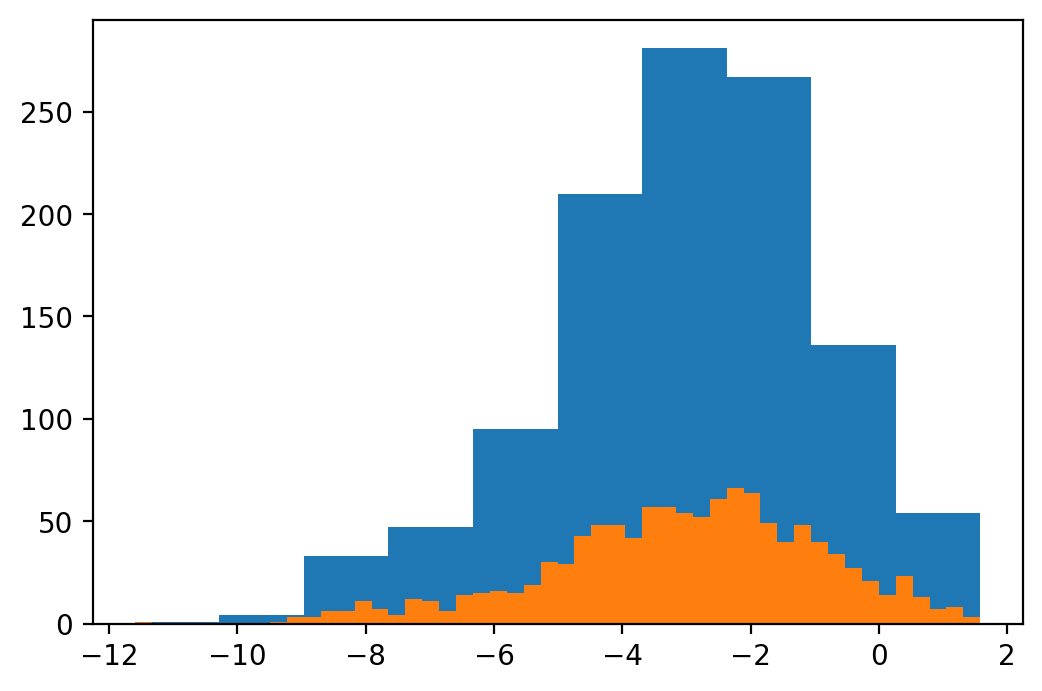

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#주피터 노트북에서 시각화를 사용하기 위한 패키지 import
import matplotlib
import matplotlib.pyplot as plt
#파이썬에서 데이터를 다루기 위한 numpy 패키지 import
import numpy as np
#Colab에서 파일을 다운로드 or 업로드하기 위한 라이브러리
from google.colab import files

#히스토그램을 그리기 위한 함수 사용 단일 변수를 입력으로 주면 분포 히스토그램을 출력해주는 기능
#인터넷에 패키지 이름과 함수명으로 검색하면 아래와 같은 doc을 찾을 수 있다.
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html

#각각을 실행할때에는 위에서 실행한 코드를 주석처리하고 실행해봅시다. 맨앞에#을 붙여주면 된다.
plt.hist(data["measured log solubility in mols per litre"])
#두번째 인자의수치에 따라 데이터의 분포를 자세히, 간단히 볼 수 있다.
plt.hist(data["measured log solubility in mols per litre"],50)
#히스토그램은 기본이 해당 값의 빈도를 사용하여 그래프를 그리지만 density=인자에 True를 주게되면 밀도로 그려준다.
plt.hist(data["measured log solubility in mols per litre"],50,density=True)
#그림의 resolution이 낮아 사용하기 어려울 경우 아래와 같이 사용하면 저장될 파일의 dpi값을 높여 resolution을 좋게 할 수 있다.
#DPI(dots per inch)의 줄임말로 DPI가 높을수록 해상도가 좋아진다.
plt.savefig('histogram.png', dpi = 100)
plt.show()
files.download("histogram.png")

## 스캐터 플롯 사용해보기
Molecular Weight와 measured log solubility in mols per litre와의 관계를 살펴보기 위해서 스캐터 플롯을 그려볼 수 있다.

스캐터 플롯의 첫번째인자는 그래프의 X에 해당하고 두번째 인자는 그래프의 y에 해당한다.

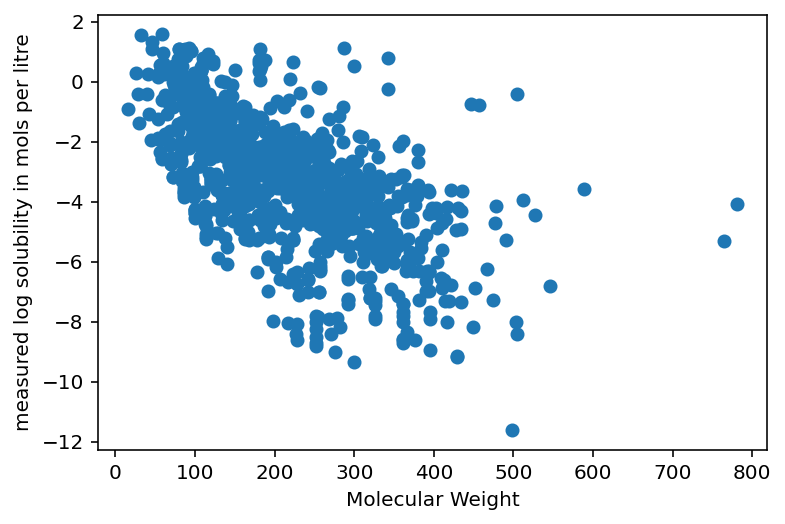

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data["Molecular Weight"],data["measured log solubility in mols per litre"])
#아래와 같이 xlabel, ylabel에 값을 추가해주면 그래프의 x축 y축에 이름을 줄 수 있다.
plt.xlabel("Molecular Weight")
plt.ylabel("measured log solubility in mols per litre")
plt.show()

## 박스플롯 사용해보기

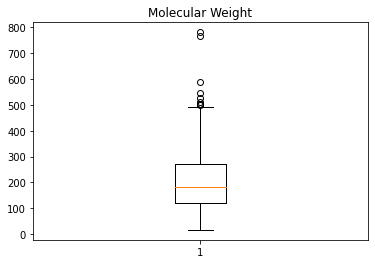

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(data["Molecular Weight"])
#아래와 같이 title에 원하는 값을 추가해주면 그래프의 타이틀에 해당 값을 보여줄 수 있다.
plt.title("Molecular Weight")
plt.show()

박스 플롯을 사용하는 이유는 많은 데이터를 눈으로 확인하기 어려울 때 그림을 이용해 데이터 집합의 범위와 중앙값을 빠르게 확인할 수 있는 목적으로 사용한다. 또한 통계적으로 이상치(outlier)가 있는지도 확인이 가능하다.

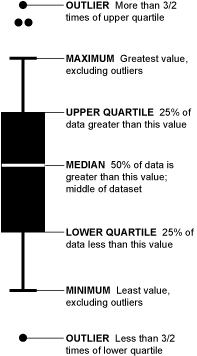

## 파이차트 사용해보기

파이 차트: 각 항목이 차지하는 비율을 나타내는데 편리하다.


0     635
1     307
2     137
3      22
4      11
6       6
5       6
8       2
11      1
7       1
Name: Number of H-Bond Donors, dtype: int64


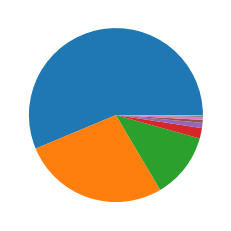

In [ ]:
print(data["Number of H-Bond Donors"].value_counts())
plt.pie(data["Number of H-Bond Donors"].value_counts())
plt.show()

## 모든 변수의 분포를 한번에 살펴볼 수 있는 pairplot사용해보기

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


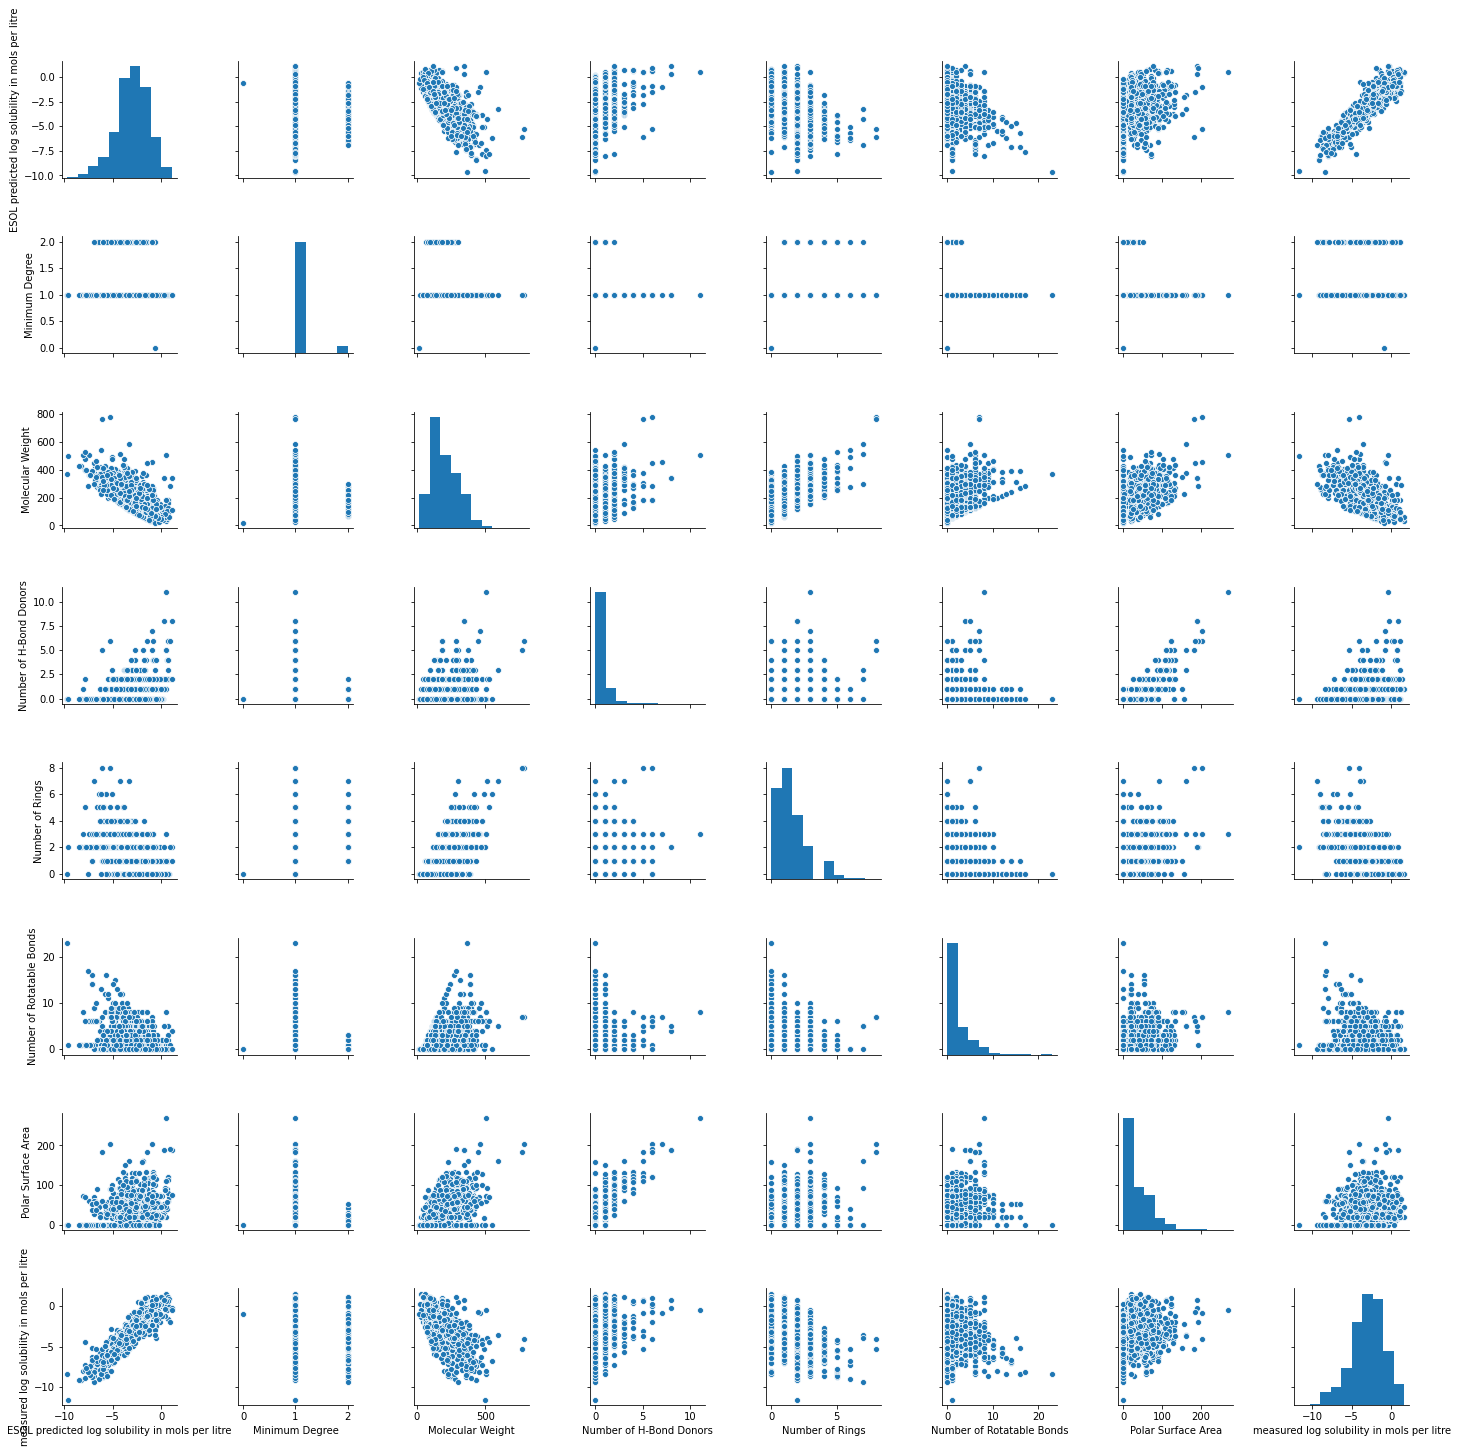

In [ ]:
sns.pairplot(data)